# Visualization case study 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
diamonds=pd.read_csv("diamonds.csv")

In [6]:
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [7]:
 print(diamonds.shape)

(53940, 10)


In [8]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
diamonds.query('price == 18823')

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


In [12]:
diamonds.query('price == 326')

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


Text(0.5, 0, 'Prices')

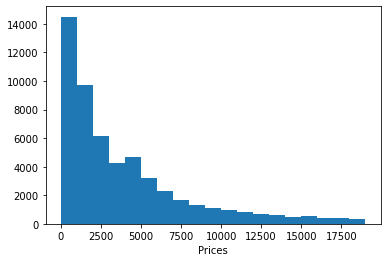

In [20]:
bins=np.arange(0,diamonds['price'].max()+ 1000, 1000)
plt.hist(data=diamonds, x="price", bins=bins);
plt.xlabel("Prices");

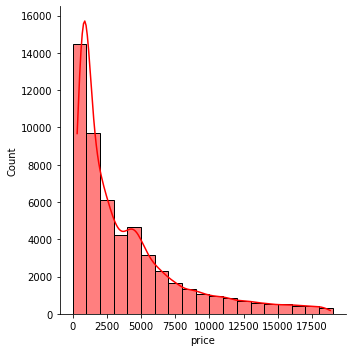

In [24]:
sns.displot(diamonds['price'], kde=True,bins=bins, color="red")

The histogram distribution of diamond prices is right skewed and it shows that most of the diamonds' prices are below 2500

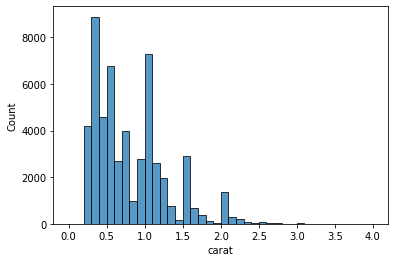

In [126]:
bins=np.arange(0,4+0.1,0.1)
sns.histplot(diamonds['carat'],bins=bins);

The carat weight histrogram distribution is multimodal. The weights of gold seem not to exceed 4 carats

In [54]:
diamonds.cut.value_counts()
order_1=diamonds.cut.value_counts().index

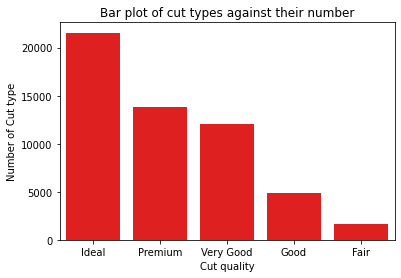

In [55]:
sns.countplot(data=diamonds, x="cut", order=order_1, color="red");
plt.xlabel('Cut quality')
plt.ylabel('Number of Cut type')
plt.title("Bar plot of cut types against their number");

The ideal cut type is the most occuring and the least occuring type is the fair cut

In [56]:
order_2=diamonds.color.value_counts().index

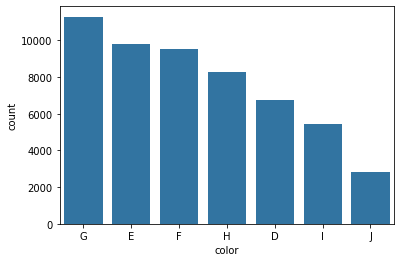

In [57]:
sns.countplot(data=diamonds, x="color", order=order_2, color=sns.color_palette()[0]);

G is the most common color of the diamonds and the least was j

In [58]:
order_3=diamonds.clarity.value_counts().index

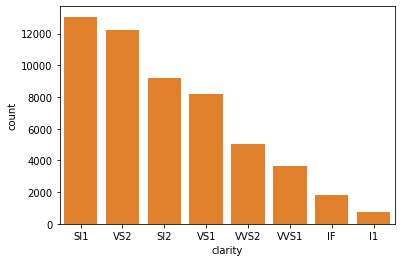

In [67]:
sns.countplot(data=diamonds, x="clarity", order=order_3, color=sns.color_palette()[1]);

In [65]:
order_3

Index(['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'], dtype='object')

The SI1 is the most clarity type in the dataset while the least common is the I1 type

In [68]:
diamonds[['color', 'clarity','cut']]=diamonds[['color', 'clarity','cut']].astype('category')

In [69]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [74]:
order_1.sort_values()

Index(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype='object')

In [77]:
order_2.sort_values()

Index(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')

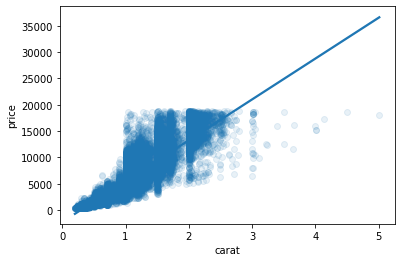

In [87]:
# bivariate plot of price vs. carat
sns.regplot(data=diamonds, x="carat", y="price",scatter_kws={'alpha':0.1},fit_reg=True,);

Price is directly proportional to carat 
There are some diamonds one carat but same price as those with 5 carats
Prices do no exceed 20000 usd

In [121]:
def plot_this(column1,column2):
    ordering=diamonds.groupby(column1)[column2].mean().index.sort_values()
    sns.violinplot(data=diamonds,x=column1, y=column2,order=ordering, color=sns.color_palette()[0],inner='quartile')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title("{} vs {} types".format(column2,column1))

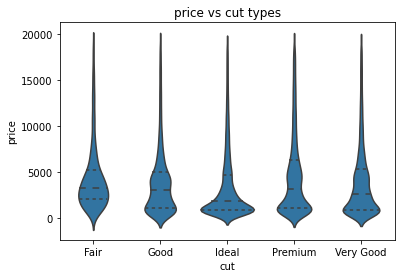

In [122]:
plot_this("cut","price")

In [103]:
diamonds.groupby('cut')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Fair,1610.0,4358.757764,3560.386612,337.0,2050.25,3282.0,5205.50,18574.0
Good,4906.0,3928.864452,3681.589584,327.0,1145.00,3050.5,5028.00,18788.0
Ideal,21551.0,3457.541970,3808.401172,326.0,878.00,1810.0,4678.50,18806.0
Premium,13791.0,4584.257704,4349.204961,326.0,1046.00,3185.0,6296.00,18823.0
Very Good,12082.0,3981.759891,3935.862161,336.0,912.00,2648.0,5372.75,18818.0


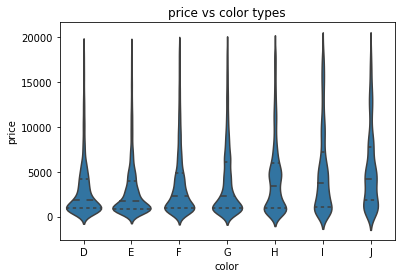

In [123]:
plot_this("color","price")

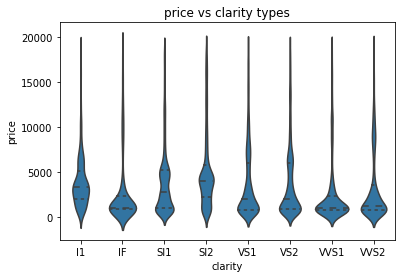

In [124]:
plot_this("clarity","price")

In [131]:
def plot_box(column1,column2):
    ordering=diamonds.groupby(column1)[column2].mean().index.sort_values()
    sns.boxplot(data=diamonds,x=column1, y=column2,order=ordering, color=sns.color_palette()[0])
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title("{} vs {} types".format(column2,column1))

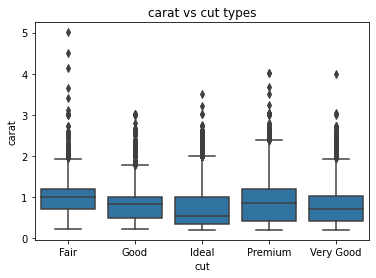

In [132]:
plot_box("cut","carat")

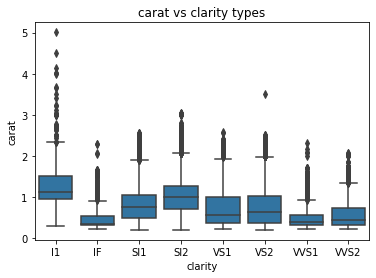

In [133]:
plot_box("clarity","carat")

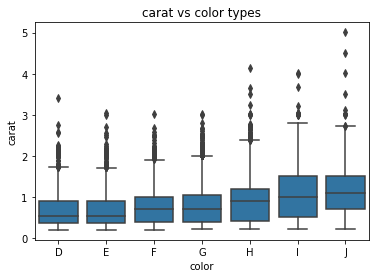

In [134]:
plot_box("color","carat")

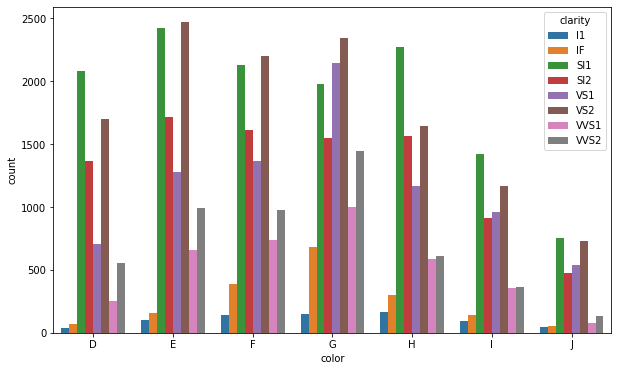

In [140]:
plt.figure(figsize=[10,6])
sns.countplot(data=diamonds, x="color", hue="clarity");

In [150]:
counts=diamonds.groupby(['color','clarity']).size().reset_index(name="count")
counts=counts.pivot(index="clarity",columns="color",values="count")
counts

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,42,102,143,150,162,92,50
IF,73,158,385,681,299,143,51
SI1,2083,2426,2131,1976,2275,1424,750
SI2,1370,1713,1609,1548,1563,912,479
VS1,705,1281,1364,2148,1169,962,542
VS2,1697,2470,2201,2347,1643,1169,731
VVS1,252,656,734,999,585,355,74
VVS2,553,991,975,1443,608,365,131


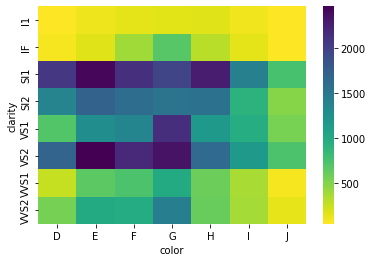

In [158]:
sns.heatmap(data=counts,cmap="viridis_r");

In [164]:
np.random.seed(2018)
sample=np.random.choice(diamonds.shape[0],500, replace=False)
diamonds_sample=diamonds.loc[sample]

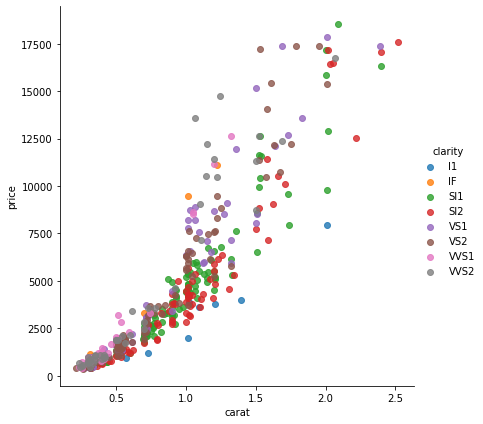

In [168]:
g=sns.FacetGrid(data=diamonds_sample, hue="clarity",height=6)
g.map(sns.regplot, "carat","price",fit_reg=False);
g.add_legend();

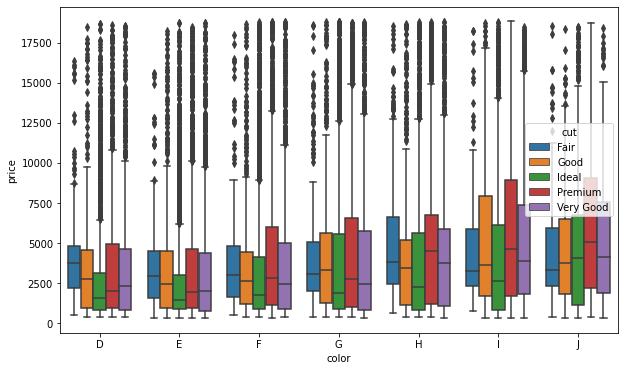

In [183]:
#two quali an 1 quanti
plt.figure(figsize=[10,6])
sns.boxplot(data=diamonds, x="color", y="price", hue="cut");

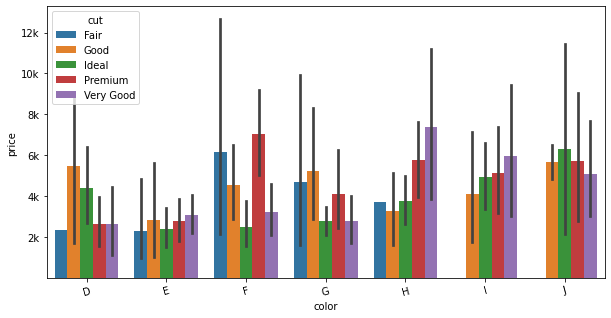

In [182]:
plt.figure(figsize=[10,5])
sns.barplot(data=diamonds_sample, x="color", y="price", hue="cut");
plt.xticks(rotation=15);
plt.yticks([2000,4000,6000,8000,10000,12000],['2k','4k','6k','8k','10k','12k']);

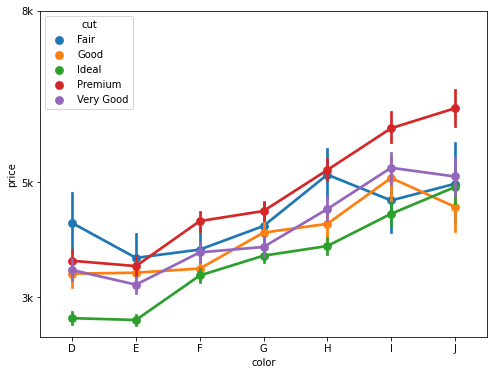

In [181]:
plt.figure(figsize = [8,6])

ax = sns.pointplot(data = diamonds, x = 'color', y = 'price', hue = 'cut')
#plt.yscale('log')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor = True)

plt.show();